In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#JAS imports
import pickle as pkl
import os
import sys
from math import *
import datetime as dt
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
sys.path.append('/glade/p/ral/nsap/jsauer/JAS/A2E-MMC/A2e-MMC_GitHub/jsauer-NCAR/mmctools/')
from MMC_Data import MMC_Data as mmcd

In [2]:
dfObs=pd.read_pickle('/glade/p/ral/nsap/jsauer/JAS/A2E-MMC/2013/PKL-Data/TTU200m_2013_1108-1Hz.pkl', compression='infer')

In [3]:
TTUdataObs = mmcd(dfObs)
TTUdataObs.setRunningMeans(10,TTUdataObs.dataSetDict['levels'])

In [4]:
dt=pd.Series(TTUdataObs.dataDict['datetime'])
dfPDObs = pd.DataFrame()

In [5]:
for key in TTUdataObs.dataDict.keys():
    if key != 'datetime':
      #print(key)
      dfPDObs[key]=pd.Series(TTUdataObs.dataDict[key].flatten())

In [6]:
profileLen = floor(len(dfPDObs['z'].values)/(TTUdataObs.dataSetLength-1))
timeLenObs = floor(len(dfPDObs['z'].values)/10)
timeLen = floor(len(dfPDObs['z'].values)/profileLen)
print(TTUdataObs.dataSetLength)
print(profileLen)
print(timeLen)
print(timeLenObs)
print(len(dfPDObs['w'].values))
print(dfPDObs['w'].values.reshape(timeLen,profileLen).shape)
#print(type(dfPDObs['w'].rolling(600).mean().values.reshape(timeLen,profileLen)[:,4]))


86400
10
86399
86399
863990
(86399, 10)


Text(0.5,0,'$time$ $[\\mathrm{HH:MM}]$ $Z$')

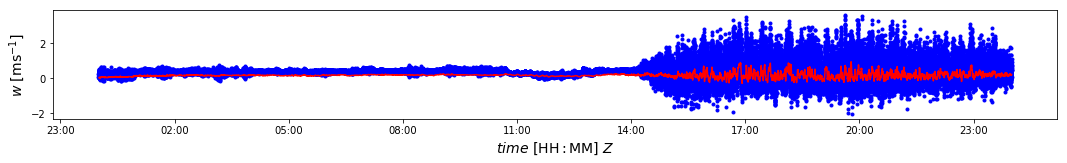

In [7]:
sonicLevel=6
myFmt = mdates.DateFormatter('%H:%M')
fig,axs = plt.subplots(1,1,figsize=(18,2))
axs.plot(dt,dfPDObs['w'].values.reshape(timeLen,profileLen)[:,sonicLevel],'b.')
axs.plot(dt,dfPDObs['w'].rolling(10*60).mean().values.reshape(timeLen,profileLen)[:,sonicLevel],'r-')
axs.xaxis.set_major_formatter(myFmt)
axs.set_ylabel(r'$w$ $[\mathrm{ms^{-1}}]$',fontsize=14)
axs.set_xlabel(r'$time$ $[\mathrm{HH:MM}]$ $Z$',fontsize=14)

(150, 300)

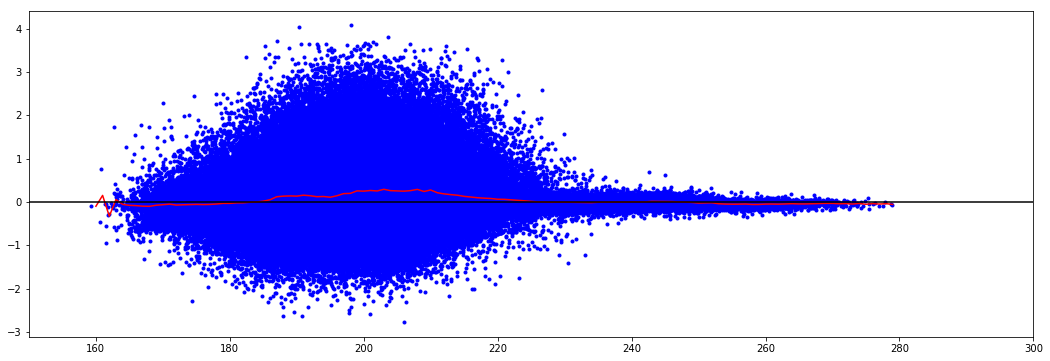

In [8]:
wdir_bins=np.linspace(0,360,361)
binned_wdir = pd.cut(dfPDObs['wdir'], wdir_bins)
dfPDObs['wdir'].groupby(binned_wdir).count()
fig,axs = plt.subplots(1,1,figsize=(18,6))
#axs.plot(dfPDObs['wdir'].values.reshape(timeLen,profileLen)[:,4],dfPDObs['w'].values.reshape(timeLen,profileLen)[:,4],'b.')
axs.plot(dfPDObs['wdir'].values,dfPDObs['w'].values,'b.')
axs.plot(wdir_bins[1:],dfPDObs['w'].groupby(binned_wdir).mean(),'r-')
axs.plot(wdir_bins[1:],0*wdir_bins[1:],'k-')
axs.set_xlim(150,300)


In [9]:
figFileName = "testTiltCorrected_TTU.png" #
fig.savefig(figFileName,dpi=300)